In [1]:
import os
import re
import sys

import pathlib
from pathlib import Path

import pandas as pd
import numpy as np

import math

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

In [6]:
# Directory with the dataset for office energy use:
ROOT_DIR = "data"

In [3]:
# Helper (support)
from support import input_helper

In [4]:
# A function used to define the thickness of x and y axis:
def style_ax(ax):
    for axis in ['top', 'bottom', 'left', 'right']:
        ax.spines[axis].set_linewidth(0.5)
        ax.tick_params(width=0.5)
        ax.set_xlabel(None)
    return ax

In [5]:
offices_data = input_helper.get_data(
    'OfficeBldgs_Benchmark.xlsx', directory=ROOT_DIR)

In [6]:
print("offices_data, sheet names = \n {}\n".format(offices_data.sheet_names))

offices_data, sheet names = 
 ['Benchmark_BXL', 'Benchmark_PARIS', 'DDU']



In [7]:
# Create a DataFrame:
offices_BXL = offices_data.parse('Benchmark_BXL').drop(['reference'], axis=1).set_index('No')

In [8]:
offices_BXL

,City,Year,Number of bldgs,Typology,"min area, m²","max area, m²","average area, m²","electricity, kWh/m²","fuel, kWh/m²","Total final energy, kWh/m²",DD
No,,,,,,,,,,,
1,Brussels,2012,43,private,2000.0,10000.0,5419,122.000000,112.000000,234.000000,1914.7
2,Brussels,2012,34,private,10000.0,NaN,17061,127.000000,87.000000,214.000000,1914.7
3,Brussels,2012,89,private,NaN,NaN,9267,126.000000,97.000000,223.000000,1914.7
4,Brussels,2012,58,public,2000.0,10000.0,6481,85.000000,82.000000,167.000000,1914.7
5,Brussels,2012,55,public,10000.0,NaN,18576,95.000000,80.000000,175.000000,1914.7
6,Brussels,2012,129,public,NaN,NaN,11893,94.000000,83.000000,177.000000,1914.7
7,Brussels,2011,37,private,2000.0,10000.0,4708,150.000000,103.000000,253.000000,1514.5
8,Brussels,2011,28,private,10000.0,NaN,17378,129.000000,80.000000,209.000000,1514.5
9,Brussels,2011,90,private,NaN,NaN,10754,121.000000,79.000000,200.000000,1514.5


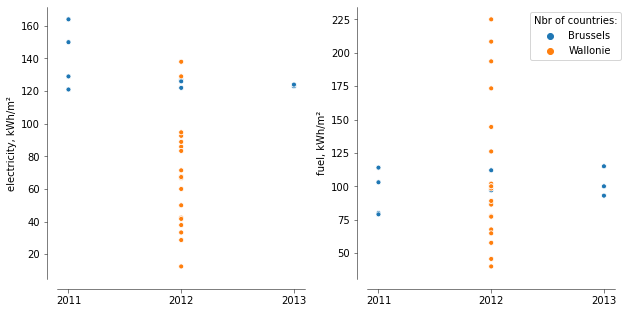

In [24]:
# Plot private offices:
fig, axes = plt.subplots(nrows=1, ncols=2,
                         sharex=True, sharey=False,
                         figsize=(10, 5))

for col, data in enumerate(['electricity, kWh/m²', 'fuel, kWh/m²']):
    ax = axes[col]
    sns.scatterplot(data=offices_BXL.loc[(offices_BXL.Typology == 'private')],
                    x='Year', y=f"{data}",
                    hue='City',
                    marker='.', s=100,
                    ax=ax)
    style_ax(ax)
    ax.get_legend().remove()


# Add legend:
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', ncol=1,
           title='Nbr of countries:',
           bbox_to_anchor=(0.87, 0.85))

ax.xaxis.label.set_visible(False)
plt.xticks(np.arange(2011, 2014, 1))

fig.subplots_adjust(wspace=0.25)

sns.despine(offset=10)
plt.show()